In [ ]:
import moviepy as mp
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
from difflib import SequenceMatcher

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def get_monochrome(img):
    return np.mean(img.astype(float), axis=2) / 255

def get_words_from_frame(img, config=''):
    cv2.imwrite('output/modified_still.png', 
                np.stack([(img * 255).astype(int)]*3, axis=2))
    return pytesseract.image_to_string('output/modified_still.png', config=config)

In [193]:
print(get_words_from_frame(img, config='--psm 11'))

Python 3.13,

2.96 GB

Python Software Foundation | 6/26/2025

Windows Software Development Kit - Windows 10.0.22621.3233

2.54 GB

10:1.22621.3233 | Microsoft Corporation | 4/4/2025

Joplin 3.3.12

1.30 GB

3.3.12 | Laurent Cozic | 5/6/2025

Microsoft OneDrive

419 MB

25.105.0601.0002 | Microsoft Corporation | 6/30/2025

Git

348 MB

2.48.1 | The Git Development Community | 3/15/2025

ExpressVPN

330 MB

7.91.69 | ExpressVPN | 6/17/2025

HP Officelet Pro 9020 series Basic Device Software

320 MB

49.1.4679,2245 | HP Inc.

| 4772025

Copilot

a

_



In [ ]:
video = mp.VideoFileClip(r'C:\Users\gavin\Videos\Screen Recordings\Screen Recording 2025-07-07 144937.mp4')

name_size = list()
interval = 0.5
for tt in np.arange(0., video.duration, interval)[:8]:

In [194]:
tt = 0.

In [208]:
    img = get_monochrome(video.to_ImageClip(t=14.).get_frame(0))

In [209]:
    raw_txt = get_words_from_frame(img, config='--psm 11')

In [213]:
raw_txt = [i for i in raw_txt.split('\n') if i != '']

In [219]:
raw_txt_type = [1 if any([j in i for j in ['KB', 'MB', 'GB']]) else 2 if '|' in i else 0 for i in raw_txt]

In [224]:
name_ix = [*[i for i in range(len(raw_txt)) if raw_txt_type[i] == 0], len(raw_txt)]

In [232]:
[[raw_txt[name_ix[i]: name_ix[i+1]][raw_txt_type[name_ix[i]: name_ix[i+1]].index(j) if j in raw_txt_type[name_ix[i]: name_ix[i+1]] else ''] for j in range(3)]
 
 
 for i in range(len(name_ix)-1)]

TypeError: list indices must be integers or slices, not str

In [ ]:
    raw_name_size = [i for i in raw_txt.split('\n') if i != '' and '|' not in i]
    nn = int(len(raw_name_size) / 2)
    nsz = list(zip(raw_name_size[:nn], raw_name_size[-nn:]))

    verified_olp = 0
    for olp in np.arange(min(len(name_size), len(nsz)))+1:
        smsc = np.mean([SequenceMatcher(None, nsz[n][0], name_size[-olp+n][0]).ratio() 
                        for n in range(olp)])
        if smsc == 1:
            verified_olp = olp
            break

    name_size += [nsz[verified_olp:]]
    
    j = int(best_olp / 2)

    print(best_olp, j)
    print(name_size[:-j])
    print(nsz[best_olp-j:])
    print()
    
    name_size = [*name_size[:-j], *nsz[best_olp-j:]]

name_size

{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'mp42', 'minor_version': '0', 'compatible_brands': 'mp41isom', 'creation_time': '2025-07-07T18:49:11.000000Z'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [894, 536], 'bitrate': 1933, 'fps': 30.0, 'codec_name': 'h264', 'profile': '(Main)', 'metadata': {'Metadata': '', 'creation_time': '2025-07-07T18:49:11.000000Z', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]', 'encoder': 'AVC Coding'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 192, 'metadata': {'Metadata': '', 'creation_time': '2025-07-07T18:49:11.000000Z', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 26.15, 'bitrate': 2127, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 

[('Python 3.13,', '2.96 GB'),
 ('Windows Software Development Kit - Windows 10.0.22621.3233', '2.54 GB'),
 ('Joplin 3.3.12', '1.30 GB'),
 ('Microsoft OneDrive', '419 MB'),
 ('Git', '348 MB'),
 ('ExpressVPN.', '330 MB'),
 ('HP Officelet Pro 9020 series Basic Device Software', '320 MB'),
 ('Copilot', '241 MB'),
 ('HP One Agent', '214 MB'),
 ('Java 8 Update 281', '108 MB'),
 ('Microsoft 365 Copilot', '102 MB'),
 ('Audacity 31.3', '87.9 MB'),
 ('HP Smart', '33.2 MB'),
 ('Microsoft Visual C++ 2015-2022 Redistributable (x64) - 14.42.34433',
  '20.6 MB'),
 ('Microsoft Visual C++ 2013 Redistributable (x64) - 12.0.30501', '20.5 MB'),
 ('Microsoft Visual C++ 2012 Redistributable (x64) - 1.0.61030', '18.2 MB'),
 ('Microsoft Visual C++ 2015-2022 Redistributable (x86) - 14.42.34438 ENT',
  'Product Improvement Study for HP Officelet Pro 9020 series morn'),
 ('Microsoft Visual C++ 2012 Redistributable (x86) - 11.0.61030 17AMB',
  'Windows PC Health Check')]

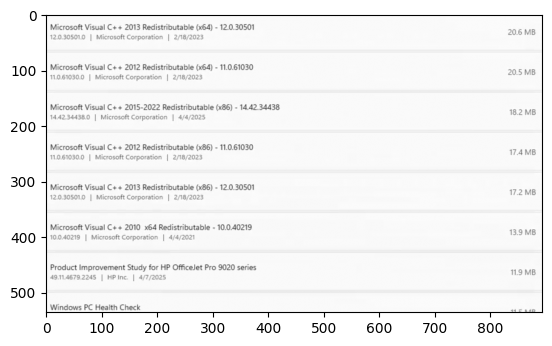

In [181]:
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

In [157]:
print(raw_txt)

Microsoft Visual C++ 2013 Redistributable (x64) - 12.0.30501

12,0.30501.0 | Microsoft Corporation | 2/18/2023 ae
Microsoft Visual C++ 2012 Redistributable (x64) - 11.0.61030 205MB
11.0.61030.0 | Microsoft Corporation | 2/18/2023,

Microsoft Visual C++ 2015-2022 Redistributable (x86) - 14.42.34438 ENT
1442344380 | Microsoft Corporation | 4/4/2025 °
Microsoft Visual C++ 2012 Redistributable (x86) - 11.0.61030 17AMB
11.0.61030.0 | Microsoft Corporation | 2/18/2023, °
Microsoft Visual C++ 2013 Redistributable (x86) - 12.0.30501 Fen
12.0.305010 | Microsoft Corporation | 2/18/2023 .
Microsoft Visual C++ 2010 x64 Redistributable - 10.0.40219 REPT
10,0.40219 | Microsoft Corporation | 4/4/2021 é
Product Improvement Study for HP Officelet Pro 9020 series morn

491.4679.2245 | HP ine. | 4/7/2025

Windows PC Health Check



In [148]:
[*name_size[:-j], *nsz[best_olp-j:]]

[('Python 3.13,', '2.96 GB'),
 ('Windows Software Development Kit - Windows 10.0.22621.3233', '2.54 GB'),
 ('Joplin 3.3.12', '1.30 GB'),
 ('Microsoft OneDrive', '419 MB'),
 ('Git', '348 MB'),
 ('ExpressVPN', '330 MB'),
 ('HP Officelet Pro 9020 series Basic Device Software', '320 MB'),
 ('Copilot', '241 MB'),
 ('HP One Agent', '214 MB'),
 ('Java 8 Update 281', '108 MB'),
 ('Microsoft 365 Copilot', '102 MB'),
 ('Audacity 31.3', '87.9 MB'),
 ('HP Smart', '33.2 MB'),
 ('Microsoft Visual C++ 2015-2022 Redistributable (x64) - 14.42.34433',
  '20.7 MB'),
 ('Microsoft Visual C++ 2013 Redistributable (x64) - 12.0.30501', 'eg')]